In [4]:
from scipy.io import loadmat 
import pandas as pd
data = loadmat('../datasets/imagenet/meta.mat')


In [11]:
import scipy.io
import pandas as pd

# 载入 .mat 文件
mat_data = scipy.io.loadmat('../datasets/imagenet/meta.mat')
synsets = mat_data['synsets']

# 初始化数据列表
data_list = []

# 迭代每个元组，提取我们需要的信息
for synset in synsets:
    synset_data = synset[0]
    row_data = {
        'ILSVRC2012_ID': synset_data[0][0][0],
        'WNID': synset_data[1][0],
        'words': synset_data[2][0],
        'gloss': synset_data[3][0],
        'num_children': synset_data[4][0][0],
        'wordnet_height': synset_data[6][0][0],
        'num_train_images': synset_data[7][0][0]
    }
    # Note: 'children' 字段被省略，因为它可能为空，且很难表示在CSV中
    data_list.append(row_data)

# 创建DataFrame
df = pd.DataFrame(data_list)

# 输出CSV文件
csv_file = '../datasets/imagenet/meta.csv'
df.to_csv(csv_file, index=False)

print(f"CSV file saved as {csv_file}")

CSV file saved as ../datasets/imagenet/meta.csv


4
                            filename  label
2648   n01755581/n01755581_4574.JPEG      4
2649  n01755581/n01755581_10398.JPEG      4
2650   n01755581/n01755581_5540.JPEG      4
2651   n01755581/n01755581_8644.JPEG      4
2652   n01755581/n01755581_3085.JPEG      4
                         filename  label
78   ILSVRC2012_val_00000749.JPEG      4
160  ILSVRC2012_val_00001593.JPEG      4
291  ILSVRC2012_val_00002776.JPEG      4
383  ILSVRC2012_val_00003706.JPEG      4
467  ILSVRC2012_val_00004448.JPEG      4


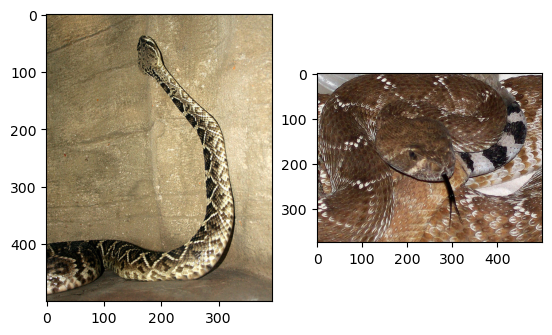

In [67]:
# test if the file indices are correct
val_dir = '../datasets/imagenet/imagenet/val'
train_dir = '../datasets/imagenet/imagenet/train'

train_info = pd.read_table('../datasets/imagenet/ImageNet100_label_50_0.5.txt', sep=' ')
val_info = pd.read_table('../datasets/imagenet/ImageNet100_test_50.txt', sep=' ')
train_info.columns = ['filename', 'label']
val_info.columns = ['filename', 'label']

import random
test_idx = random.randint(0, 50)
print(test_idx)
print(train_info[train_info['label'] == test_idx].head())
print(val_info[val_info['label'] == test_idx].head())





f1 = train_info[train_info['label'] == test_idx]['filename'].values[0]
f2 = val_info[val_info['label'] == test_idx]['filename'].values[0]

# f1 = train_info[train_info['label'] == 5]['filename'].values[0]
# f2 = 'ILSVRC2012_val_00000016.JPEG'

# show the image
import os
img_train_path = os.path.join(train_dir, f1)
img_val_path = os.path.join(val_dir, f2)

# show the image
from PIL import Image
img_train = Image.open(img_train_path)
img_val = Image.open(img_val_path)

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(img_train)
plt.subplot(122)
plt.imshow(img_val)
plt.show()

In [52]:
# correct mistake on gt
true_gt = pd.read_table('../datasets/imagenet/ILSVRC2012_validation_ground_truth.txt', header=None)
filename_table = pd.read_table('../datasets/imagenet/imagenet_val_gt.txt', sep=' ', header=None)


In [55]:
filename_table.iloc[:,1]=true_gt.iloc[:,0]

In [56]:
filename_table

,0,1
0,ILSVRC2012_val_00000001.JPEG,490
1,ILSVRC2012_val_00000002.JPEG,361
2,ILSVRC2012_val_00000003.JPEG,171
3,ILSVRC2012_val_00000004.JPEG,822
4,ILSVRC2012_val_00000005.JPEG,297
...,...,...
49995,ILSVRC2012_val_00049996.JPEG,10
49996,ILSVRC2012_val_00049997.JPEG,495
49997,ILSVRC2012_val_00049998.JPEG,128
49998,ILSVRC2012_val_00049999.JPEG,848


In [57]:
filename_table.to_csv('../datasets/imagenet/new_gt.txt', sep=' ', header=None, index=None)